In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer
import scipy as scipy
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
import time
import os
import nltk
nltk.download('wordnet')
import nltk
import re
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import sklearn.metrics
print(os.listdir("../Documents"))
import warnings
from IPython.display import display
import matplotlib.pyplot as plt

import re
warnings.filterwarnings('ignore')


<h1>Load and read dataset</h1>

In [73]:
def read_dataset(path):
    return json.load(open(path)) 

train = read_dataset('../IME672/train.json')
test = read_dataset('../IME672/test.json')  


<h1>Data Visualization</h1>

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train = pd.read_json('../IME672/train.json')
df_test=pd.read_json('../IME672/test.json')
df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


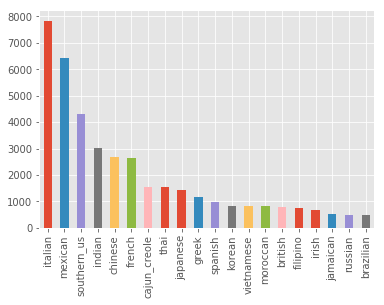

In [75]:
plt.style.use('ggplot')
df_train['cuisine'].value_counts().plot(kind='bar')

 <h1>Most common ingredients for every cuisine:<h1>

In [76]:
from collections import Counter
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [77]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


Ingredients among the top 10 ingredients are highly specific for a certain cuisine

In [78]:
df_train['every_ingredients'] = df_train['ingredients'].map(";".join)
df_train.head()


,cuisine,id,ingredients,every_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


<h1>Plot for all the ingredients as per the cuisine<h1>

In [79]:
import numpy as np
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime',
       'milk', 'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots',
       'sour cream', 'soy sauce', 'sugar', 'tomatoes', 'un

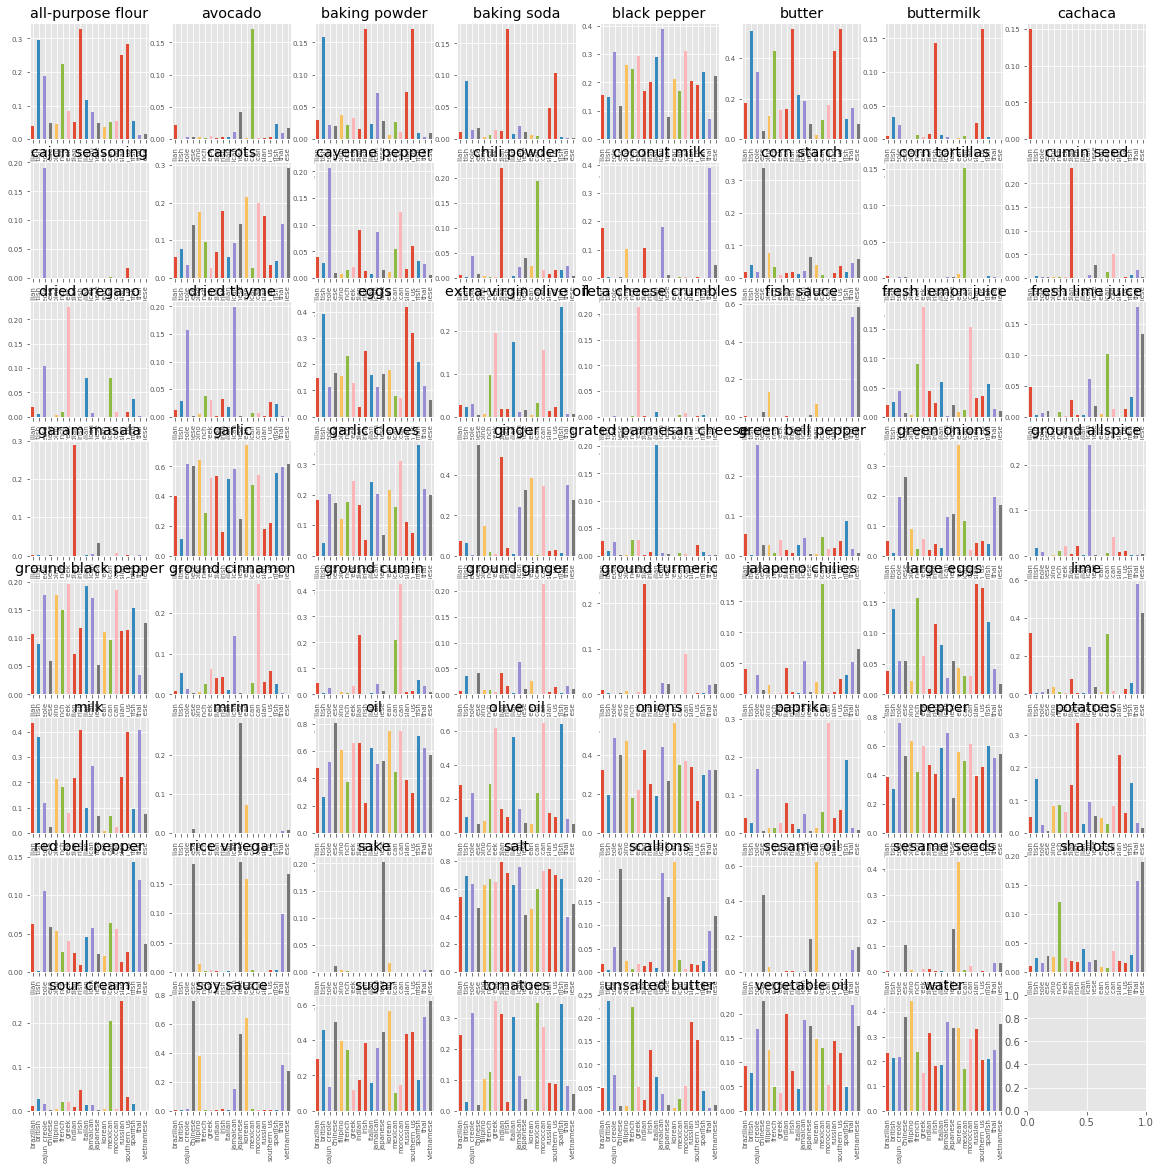

In [80]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = df_train['every_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

# Preprocessing


In [81]:
## convert multi-word ingredient into single word by substituting underscore on place of space
def sub_space(x):
    temp_value = list()
    for i in x:
        temp_value.append(re.sub(r'[^0-9a-zA-Z]+','_',i.lower()))
    return temp_value

df_train['ingredients_new'] = df_train['ingredients'].apply(sub_space)
df_test['ingredients_new'] = df_test['ingredients'].apply(sub_space)

## convert list of ingredients into a sentence
def convert_list_to_sent(x):
    return ' '.join(x)

df_train['ingredient_sent'] = df_train['ingredients_new'].apply(convert_list_to_sent)
df_test['ingredient_sent'] = df_test['ingredients_new'].apply(convert_list_to_sent)

display(df_train.head())
display(df_test.head())

,cuisine,id,ingredients,every_ingredients,ingredients_new,ingredient_sent
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...,"[romaine_lettuce, black_olives, grape_tomatoes...",romaine_lettuce black_olives grape_tomatoes ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...,"[plain_flour, ground_pepper, salt, tomatoes, g...",plain_flour ground_pepper salt tomatoes ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...,"[eggs, pepper, salt, mayonaise, cooking_oil, g...",eggs pepper salt mayonaise cooking_oil green_c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt,"[water, vegetable_oil, wheat, salt]",water vegetable_oil wheat salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...,"[black_pepper, shallots, cornflour, cayenne_pe...",black_pepper shallots cornflour cayenne_pepper...


,id,ingredients,ingredients_new,ingredient_sent
0,18009,"[baking powder, eggs, all-purpose flour, raisi...","[baking_powder, eggs, all_purpose_flour, raisi...",baking_powder eggs all_purpose_flour raisins m...
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...","[sugar, egg_yolks, corn_starch, cream_of_tarta...",sugar egg_yolks corn_starch cream_of_tartar ba...
2,41580,"[sausage links, fennel bulb, fronds, olive oil...","[sausage_links, fennel_bulb, fronds, olive_oil...",sausage_links fennel_bulb fronds olive_oil cub...
3,29752,"[meat cuts, file powder, smoked sausage, okra,...","[meat_cuts, file_powder, smoked_sausage, okra,...",meat_cuts file_powder smoked_sausage okra shri...
4,35687,"[ground black pepper, salt, sausage casings, l...","[ground_black_pepper, salt, sausage_casings, l...",ground_black_pepper salt sausage_casings leeks...


# Cleaning

In [83]:
def text_prepare(ingredient):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    DOUBLE_SPACE_RE = re.compile('\s{2,}')
    STOPWORDS = set(stopwords.words('english'))
    
    ingredient = ingredient.strip(" ")
    #lower casing letters
    ingredient = ingredient.lower()
    #replacing symbols by space
    ingredient = re.sub(REPLACE_BY_SPACE_RE,' ',ingredient)
    #deleting bad words
    ingredient = re.sub(BAD_SYMBOLS_RE,'',ingredient)
    #removing double space
    ingredient = re.sub(DOUBLE_SPACE_RE,'',ingredient)
    # remove numbers with percentages
    ingredient = re.sub('[0-9]*% ','',ingredient)
    # remove ounce information
    ingredient = re.sub("\(.*oz.\)",'',ingredient)
    # remove brand names with registered
    ingredient = re.sub("[A-Z]*[a-z]*®",'',ingredient)
    # remove brand names with trademark
    ingredient = re.sub("[A-Z]*[a-z]*™", '', ingredient)
    # remove numbers with +
    ingredient = re.sub("[0-9]+",'',ingredient)
    # replace & and -
    ingredient = ingredient.replace("&",'')
    ingredient = ingredient.replace("-", '')
    # lowercase all indegredients
    ingredient = ingredient.lower()
    # removing whitespacing once more
    ingredient = ingredient.strip()
    #removing stop words
    ingredient = ' '.join([word for word in ingredient.split(" ") if word not in STOPWORDS])
    
    return ingredient
def apply_text_prepare_to_list(ingredient_list):
    return ' '.join([text_prepare(ingredient) for ingredient in ingredient_list])
df_train


,cuisine,id,ingredients,every_ingredients,ingredients_new,ingredient_sent
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...,"[romaine_lettuce, black_olives, grape_tomatoes...",romaine_lettuce black_olives grape_tomatoes ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...,"[plain_flour, ground_pepper, salt, tomatoes, g...",plain_flour ground_pepper salt tomatoes ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...,"[eggs, pepper, salt, mayonaise, cooking_oil, g...",eggs pepper salt mayonaise cooking_oil green_c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt,"[water, vegetable_oil, wheat, salt]",water vegetable_oil wheat salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...,"[black_pepper, shallots, cornflour, cayenne_pe...",black_pepper shallots cornflour cayenne_pepper...
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...",plain flour;sugar;butter;eggs;fresh ginger roo...,"[plain_flour, sugar, butter, eggs, fresh_ginge...",plain_flour sugar butter eggs fresh_ginger_roo...
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...",olive oil;salt;medium shrimp;pepper;garlic;cho...,"[olive_oil, salt, medium_shrimp, pepper, garli...",olive_oil salt medium_shrimp pepper garlic cho...
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...",sugar;pistachio nuts;white almond bark;flour;v...,"[sugar, pistachio_nuts, white_almond_bark, flo...",sugar pistachio_nuts white_almond_bark flour v...
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por...",olive oil;purple onion;fresh pineapple;pork;po...,"[olive_oil, purple_onion, fresh_pineapple, por...",olive_oil purple_onion fresh_pineapple pork po...
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...",chopped tomatoes;fresh basil;garlic;extra-virg...,"[chopped_tomatoes, fresh_basil, garlic, extra_...",chopped_tomatoes fresh_basil garlic extra_virg...


# Lemmatization and stemming


In [65]:
wnl = WordNetLemmatizer()
def lemmatize_each_row(x):
    y = []
    for each in x:
        y.append(wnl.lemmatize(each.lower()))
    return y

df_train['lemmatized_ingredients_list'] = df_train.apply(lambda row: lemmatize_each_row(row['ingredients']), axis=1)
all_ingredients_lemmatized = []
for ingredients_lists in df_train.ingredients:
    for ingredient in ingredients_lists:
        all_ingredients_lemmatized.append(wnl.lemmatize(ingredient.lower()))
all_ingredients_lemmatized = set(all_ingredients_lemmatized)
df_test['lemmatized_test_ingredients_list'] = df_test.apply(lambda row: lemmatize_each_row(row['ingredients']), axis=1)
all_ingredients_lemmatized_test = []
for ingredients_lists in df_test.ingredients:
    for ingredient in ingredients_lists:
        all_ingredients_lemmatized_test.append(wnl.lemmatize(ingredient.lower()))
all_ingredients_lemmatized_test = set(all_ingredients_lemmatized_test)

all_ingredients_union = all_ingredients_lemmatized | all_ingredients_lemmatized_test

In [66]:
df_train

,cuisine,id,ingredients,every_ingredients,ingredients_new,ingredient_sent,lemmatized_ingredients_list
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...,"[romaine_lettuce, black_olives, grape_tomatoes...",romaine_lettuce black_olives grape_tomatoes ga...,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...,"[plain_flour, ground_pepper, salt, tomatoes, g...",plain_flour ground_pepper salt tomatoes ground...,"[plain flour, ground pepper, salt, tomato, gro..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...,"[eggs, pepper, salt, mayonaise, cooking_oil, g...",eggs pepper salt mayonaise cooking_oil green_c...,"[egg, pepper, salt, mayonaise, cooking oil, gr..."
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt,"[water, vegetable_oil, wheat, salt]",water vegetable_oil wheat salt,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...,"[black_pepper, shallots, cornflour, cayenne_pe...",black_pepper shallots cornflour cayenne_pepper...,"[black pepper, shallot, cornflour, cayenne pep..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...",plain flour;sugar;butter;eggs;fresh ginger roo...,"[plain_flour, sugar, butter, eggs, fresh_ginge...",plain_flour sugar butter eggs fresh_ginger_roo...,"[plain flour, sugar, butter, egg, fresh ginger..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...",olive oil;salt;medium shrimp;pepper;garlic;cho...,"[olive_oil, salt, medium_shrimp, pepper, garli...",olive_oil salt medium_shrimp pepper garlic cho...,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...",sugar;pistachio nuts;white almond bark;flour;v...,"[sugar, pistachio_nuts, white_almond_bark, flo...",sugar pistachio_nuts white_almond_bark flour v...,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por...",olive oil;purple onion;fresh pineapple;pork;po...,"[olive_oil, purple_onion, fresh_pineapple, por...",olive_oil purple_onion fresh_pineapple pork po...,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...",chopped tomatoes;fresh basil;garlic;extra-virg...,"[chopped_tomatoes, fresh_basil, garlic, extra_...",chopped_tomatoes fresh_basil garlic extra_virg...,"[chopped tomatoes, fresh basil, garlic, extra-..."


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(df_train['every_ingredients'].values)
X.shape



(39774, 3051)

In [30]:


print(list(cv.vocabulary_.keys())[:100])



['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

In [31]:
def generate_text(data):
    text_data = [" ".join(doc['ingredients']).lower() for doc in data]
    return text_data 

In [32]:
train_text = generate_text(train)
test_text = generate_text(test)
target = [doc['cuisine'] for doc in train]
cuisines = set(target)


In [33]:
vectorizer = CountVectorizer(analyzer = 'word',
                             ngram_range = (1,1), # Unigrams
                             binary = True, # Accounts for repetition within recipe
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = None,
                             max_df = 0.99) # Any word appearing in more than 99% of the sample will be discarded


In [36]:
tfidf = TfidfVectorizer(binary=True)
def tfidf_features(txt, flag):
    if flag == "train":
        x = tfidf.fit_transform(txt)
    else:
        x = tfidf.transform(txt)
    x = x.astype('float16')
    return x 
X = tfidf_features(train_text, flag="train")
X_test = tfidf_features(test_text, flag="test")
print(X_test)


  (0, 47)	0.3057
  (0, 152)	0.3726
  (0, 910)	0.277
  (0, 1026)	0.2527
  (0, 1729)	0.2913
  (0, 2161)	0.2695
  (0, 2212)	0.3057
  (0, 2241)	0.4983
  (0, 2680)	0.2239
  (0, 2983)	0.279
  (1, 160)	0.3027
  (1, 685)	0.1514
  (1, 717)	0.1464
  (1, 904)	0.1882
  (1, 940)	0.2054
  (1, 1550)	0.2123
  (1, 1729)	0.1453
  (1, 1880)	0.251
  (1, 2010)	0.2683
  (1, 2355)	0.302
  (1, 2627)	0.1987
  (1, 2680)	0.1117
  (1, 2740)	0.3135
  (1, 2796)	0.2406
  (1, 2908)	0.1934
  :	:
  (9943, 1056)	0.2393
  (9943, 1107)	0.06635
  (9943, 1155)	0.2252
  (9943, 1219)	0.07855
  (9943, 1225)	0.2357
  (9943, 1353)	0.2019
  (9943, 1554)	0.1206
  (9943, 1883)	0.06085
  (9943, 1891)	0.0861
  (9943, 1896)	0.10364
  (9943, 2024)	0.0643
  (9943, 2153)	0.1407
  (9943, 2221)	0.2324
  (9943, 2235)	0.22
  (9943, 2379)	0.164
  (9943, 2524)	0.1447
  (9943, 2612)	0.1854
  (9943, 2777)	0.2094
  (9943, 2807)	0.141
  (9943, 2808)	0.09564
  (9943, 2825)	0.1448
  (9943, 2962)	0.0911
  (9943, 2968)	0.2012
  (9943, 2983)	0.10565
  

<h1>Converting the list of strings to the matrix of vectors</h1>
(to be fed our nn)

In [116]:
lb = LabelEncoder()
y = lb.fit_transform(target)
y_NN = keras.utils.to_categorical(y)


<h1>Building a Neural Network model</h1>

In [117]:
model = keras.Sequential()
model.add(keras.layers.Dense(1000, kernel_initializer=keras.initializers.he_normal(seed=1), activation='relu', input_dim=3010))
model.add(keras.layers.Dropout(0.81))
model.add(keras.layers.Dense(1000, kernel_initializer=keras.initializers.he_normal(seed=2), activation='relu'))
model.add(keras.layers.Dropout(0.81))
model.add(keras.layers.Dense(20, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=4), activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<h1>Training the Neural Network model</h1>

In [ ]:
from sklearn.model_selection import train_test_split

X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X, y_NN , random_state = 0)

history = model.fit(X_train_NN, y_train_NN, epochs=20, batch_size=512, validation_split=0.1)

# model.save_weights("model.h5")
# print("Saved model to disk")


Train on 26847 samples, validate on 2983 samples
Epoch 1/20
26847/26847 [==============================] - 7s 254us/sample - loss: 2.2958 - acc: 0.3343 - val_loss: 1.5711 - val_acc: 0.5572
Epoch 2/20
26847/26847 [==============================] - 6s 215us/sample - loss: 1.4391 - acc: 0.5866 - val_loss: 1.0507 - val_acc: 0.6899
Epoch 3/20
26847/26847 [==============================] - 6s 218us/sample - loss: 1.1141 - acc: 0.6672 - val_loss: 0.8900 - val_acc: 0.7332
Epoch 4/20
26847/26847 [==============================] - 6s 230us/sample - loss: 0.9752 - acc: 0.7067 - val_loss: 0.8184 - val_acc: 0.7566
Epoch 5/20
26847/26847 [==============================] - 7s 259us/sample - loss: 0.8733 - acc: 0.7375 - val_loss: 0.7702 - val_acc: 0.7747
Epoch 6/20
10752/26847 [===========>..................] - ETA: 3s - loss: 0.8080 - acc: 0.7581

In [ ]:
score=model.evaluate(X_test_NN,y_test_NN)

In [ ]:
y_predict_NN=model.predict(X_test_NN)
predictions_encoded = lb.inverse_transform([np.argmax(pred) for pred in y_predict_NN])
y_predict_NN = lb.fit_transform(predictions_encoded)
y_test_NN_encoded=lb.inverse_transform([np.argmax(pred) for pred in y_test_NN])
y_test_NN = lb.fit_transform(y_test_NN_encoded)



In [ ]:
summary = np.zeros((20, 20), dtype=np.int32)

for y_test_i, y_predict_i in zip(y_test_NN, y_predict_NN):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary, 
                          columns=cuisines, 
                          index=cuisines)

summary_df

In [ ]:
summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [ ]:
print(classification_report(y_test_NN,y_predict_NN))

<h1>Plotting learning curves</h1>
Learning curves show us overting/underfiting

In [ ]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# X_test = tfidf_features(test_text, flag="test")

y_predict_NN=model.predict(X_test)
print(X_test.shape)
predictions_encoded = lb.inverse_transform([np.argmax(pred) for pred in y_predict_NN])
predictions = lb.inverse_transform([np.argmax(pred) for pred in predictions_encoded])
print(predictions)
test_id = [doc['id'] for doc in test]
sub = pd.DataFrame({'id': test_id, 'cuisine': predictions}, columns=['id', 'cuisine'])
sub.to_csv('output.csv', index=False)


<h1>Support Vector Machine(RBF Kernel)</h1>

In [28]:
# Model Training 
print ("Train the model ... ")
classifier = SVC(C=100, # penalty parameter
	 			 kernel='rbf', # kernel type, rbf working fine here
	 			 degree=3, # default value
	 			 gamma=1, # kernel coefficient
	 			 coef0=1, # change to 1 from default value of 0.0
	 			 shrinking=True, # using shrinking heuristics
	 			 tol=0.001, # stopping criterion tolerance 
	      		 probability=False, # no need to enable probability estimates
	      		 cache_size=200, # 200 MB cache size
	      		 class_weight=None, # all classes are treated equally 
	      		 verbose=False, # print the logs 
	      		 max_iter=-1, # no limit, let it run
          		 decision_function_shape=None, # will use one vs rest explicitly 
          		 random_state=None)
model_SVM = OneVsRestClassifier(classifier, n_jobs=1)

Train the model ... 


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state = 0)

In [30]:
st = time.time()
model_SVM.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

In [31]:
y_predict_SVM = model_SVM.predict(X_test)
y_predict_SVM=lb.inverse_transform(y_predict_SVM)
y_predict_SVM = lb.fit_transform(y_predict_SVM)

In [35]:
print('Accuracy: %0.4f [SVM RBF] [Time: %ss]' %(accuracy_score(y_test, y_predict_SVM), (time.time()-st)))

Accuracy: 0.8200 [SVM RBF] [Time: 4415.71981215477s]


In [37]:

summary = np.zeros((20, 20), dtype=np.int32)
for y_test_i, y_predict_i in zip(y_test, y_predict_SVM):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary, 
                          columns=cuisines, 
                          index=cuisines)

summary_df

,french,russian,moroccan,chinese,indian,filipino,italian,vietnamese,irish,southern_us,japanese,mexican,spanish,korean,british,jamaican,cajun_creole,brazilian,greek,thai
french,73,3,2,1,2,2,0,2,0,8,0,0,0,11,1,0,4,7,4,0
russian,0,110,1,1,0,20,1,6,12,13,2,1,0,3,0,3,23,1,1,0
moroccan,0,3,272,0,1,12,0,0,1,10,0,0,0,7,0,0,53,3,0,0
chinese,0,3,1,614,1,5,0,1,0,5,0,13,17,2,1,0,5,1,13,14
indian,1,1,1,13,121,2,0,3,2,7,0,1,1,8,0,1,7,0,7,5
filipino,0,15,3,2,2,454,3,4,6,103,1,3,1,11,1,8,35,5,0,1
italian,0,0,0,0,0,11,221,5,0,44,0,0,0,5,6,1,5,4,0,0
vietnamese,0,1,0,0,1,2,4,726,0,5,0,6,1,13,7,2,5,2,7,1
irish,0,15,0,0,0,12,2,0,97,11,1,0,1,2,0,0,16,2,0,0
southern_us,2,3,3,3,0,65,33,3,2,1752,0,2,0,12,5,5,34,7,1,0


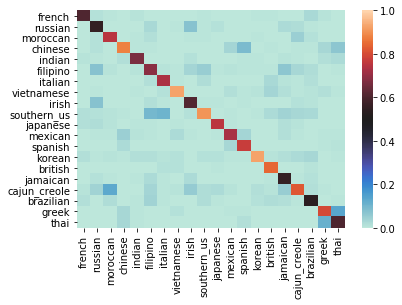

In [38]:
summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [40]:
print(classification_report(y_test,y_predict_SVM))


              precision    recall  f1-score   support

           0       0.88      0.61      0.72       120
           1       0.64      0.56      0.60       198
           2       0.78      0.75      0.76       362
           3       0.83      0.88      0.86       696
           4       0.88      0.67      0.76       181
           5       0.67      0.69      0.68       658
           6       0.79      0.73      0.76       302
           7       0.89      0.93      0.91       783
           8       0.72      0.61      0.66       159
           9       0.83      0.91      0.87      1932
          10       0.90      0.76      0.82       147
          11       0.84      0.73      0.78       348
          12       0.81      0.78      0.79       183
          13       0.92      0.93      0.92      1631
          14       0.85      0.84      0.85       199
          15       0.66      0.56      0.61       118
          16       0.78      0.82      0.80      1076
          17       0.74    

<h1>Logistic Regression</h1>

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(C=10,dual=False)
model_LR.fit(X_train , y_train)
print(model_LR.score(X_test, y_test))
y_predict_LR=model_LR.predict(X_test)


0.794147224456959


In [42]:
summary = np.zeros((20, 20), dtype=np.int32)
for y_test_i, y_predict_i in zip(y_test, y_predict_LR):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary,columns=cuisines, 
                          index=cuisines)

summary_df

,french,russian,moroccan,chinese,indian,filipino,italian,vietnamese,irish,southern_us,japanese,mexican,spanish,korean,british,jamaican,cajun_creole,brazilian,greek,thai
french,66,0,2,1,3,6,0,3,1,10,0,0,0,13,0,0,6,7,2,0
russian,0,91,3,1,0,29,0,7,8,15,3,1,0,3,1,2,32,0,2,0
moroccan,0,2,260,1,0,18,0,2,1,13,0,0,0,6,0,0,55,4,0,0
chinese,0,3,2,596,2,4,0,3,0,7,0,21,18,3,1,1,7,1,15,12
indian,3,2,1,19,106,4,0,4,1,5,0,4,0,11,0,2,9,0,6,4
filipino,0,14,6,3,1,433,2,0,9,111,2,3,0,9,3,11,40,10,0,1
italian,0,2,0,1,1,13,206,9,0,49,0,0,0,4,5,1,5,6,0,0
vietnamese,1,1,0,2,4,4,4,716,0,3,1,4,0,15,9,2,8,2,6,1
irish,1,12,0,1,0,19,0,1,77,12,0,0,0,2,2,2,28,2,0,0
southern_us,0,6,6,1,0,76,31,6,6,1718,0,4,0,14,4,4,42,11,2,1


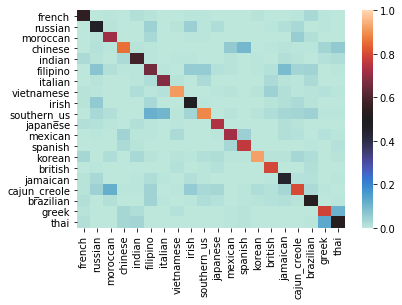

In [43]:
summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [44]:
print(classification_report(y_test,y_predict_LR))


              precision    recall  f1-score   support

           0       0.79      0.55      0.65       120
           1       0.59      0.46      0.52       198
           2       0.76      0.72      0.74       362
           3       0.82      0.86      0.84       696
           4       0.75      0.59      0.66       181
           5       0.62      0.66      0.64       658
           6       0.82      0.68      0.75       302
           7       0.87      0.91      0.89       783
           8       0.66      0.48      0.56       159
           9       0.81      0.89      0.85      1932
          10       0.85      0.74      0.79       147
          11       0.81      0.72      0.76       348
          12       0.80      0.77      0.78       183
          13       0.91      0.92      0.92      1631
          14       0.82      0.79      0.81       199
          15       0.60      0.45      0.51       118
          16       0.72      0.80      0.76      1076
          17       0.68    

<h1>Naive Bayes classifier</h1>

In [45]:
with open('../IME672/train.json') as json_data:
    data = json.load(json_data)
    json_data.close()
classes = [item['cuisine'] for item in data]
ingredients = [item['ingredients'] for item in data]
unique_ingredients = set(item for sublist in ingredients for item in sublist)
unique_cuisines = set(classes)

big_data_matrix = scipy.sparse.dok_matrix((len(ingredients), len(unique_ingredients)), dtype=np.dtype(bool))

print(big_data_matrix)

for d,dish in enumerate(ingredients):
    for i,ingredient in enumerate(unique_ingredients):
        if ingredient in dish:
            big_data_matrix[d,i] = True



Accuracy on the learning set:  0.8204606024035802


In [ ]:

clf2 = BernoulliNB(alpha = 0, fit_prior = False)
f = clf2.fit(big_data_matrix, classes)
result = [(ref == res, ref, res) for (ref, res) in zip(classes, clf2.predict(big_data_matrix))]
accuracy_learn = sum (r[0] for r in result) / len(result)

print('Accuracy on the learning set: ', accuracy_learn)

<h1>SVM(Linear Kernel)</h1>

In [47]:
model_SVM_L = SVC(kernel = 'linear', random_state = 42, probability=True)
st = time.time()
model_SVM_L.fit(X_train, y_train)
predictions_SVM = model_SVM_L.predict(X_test)
print('Accuracy: %0.4f [SVM Linear] [Time: %ss]' %(accuracy_score(y_test, predictions_SVM), (time.time()-st)))

Accuracy: 0.7905 [SVM Linear] [Time: 459.9141459465027s]


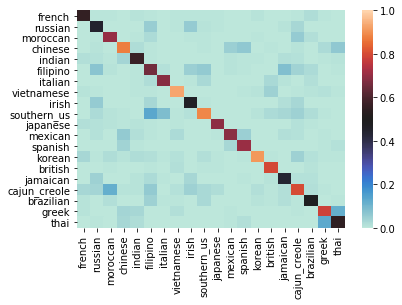

In [48]:
summary = np.zeros((20, 20), dtype=np.int32)
for y_test_i, y_predict_i in zip(y_test, predictions_SVM):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary,columns=cuisines, 
                          index=cuisines)

summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [50]:
print(classification_report(y_test,predictions_SVM))

              precision    recall  f1-score   support

           0       0.82      0.56      0.66       120
           1       0.59      0.45      0.51       198
           2       0.76      0.70      0.73       362
           3       0.78      0.88      0.83       696
           4       0.75      0.57      0.65       181
           5       0.59      0.66      0.62       658
           6       0.83      0.69      0.75       302
           7       0.87      0.93      0.90       783
           8       0.69      0.47      0.56       159
           9       0.80      0.89      0.84      1932
          10       0.93      0.69      0.79       147
          11       0.85      0.69      0.76       348
          12       0.82      0.71      0.76       183
          13       0.91      0.91      0.91      1631
          14       0.86      0.80      0.83       199
          15       0.67      0.44      0.53       118
          16       0.69      0.80      0.74      1076
          17       0.76    

<h1>Random Forest Classifier</h1>

In [51]:
model_RF = RandomForestClassifier(n_estimators = 600, random_state = 42)
st = time.time()
model_RF.fit(X_train, y_train)
predictions_RF = model_RF.predict(X_test)
print('Accuracy: %0.4f [Random Forest] [Time: %ss]' %(accuracy_score(y_test, predictions_RF), (time.time()-st)))

Accuracy: 0.7520 [Random Forest] [Time: 270.53278708457947s]


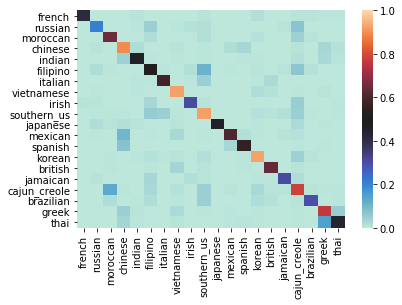

In [52]:
summary = np.zeros((20, 20), dtype=np.int32)
for y_test_i, y_predict_i in zip(y_test, predictions_RF):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary,columns=cuisines, 
                          index=cuisines)

summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [53]:
print(classification_report(y_test,predictions_RF))

              precision    recall  f1-score   support

           0       0.98      0.42      0.58       120
           1       0.71      0.21      0.33       198
           2       0.77      0.65      0.71       362
           3       0.72      0.90      0.80       696
           4       0.84      0.47      0.60       181
           5       0.63      0.51      0.56       658
           6       0.88      0.59      0.70       302
           7       0.83      0.92      0.87       783
           8       0.84      0.31      0.45       159
           9       0.71      0.93      0.80      1932
          10       1.00      0.46      0.63       147
          11       0.87      0.61      0.72       348
          12       0.88      0.56      0.68       183
          13       0.84      0.93      0.88      1631
          14       0.89      0.64      0.74       199
          15       0.86      0.31      0.45       118
          16       0.62      0.78      0.69      1076
          17       0.86    

<h1>Ensemble Classifier</h1>

In [54]:
eclf = VotingClassifier(estimators = [('model_LR',model_LR ),
                                        ('model_SVM', model_SVM_L),
                                        ('model_RF', model_RF)],
                                        voting = 'soft', weights = [1,1,1])
st = time.time()
eclf.fit(X_train, y_train)
predictions = eclf.predict(X_test)
print('Accuracy: %0.4f [Ensemble] [Time: %ss]' %(accuracy_score(y_test, predictions), (time.time()-st)))

Accuracy: 0.8060 [Ensemble] [Time: 846.9974596500397s]


In [55]:
summary = np.zeros((20, 20), dtype=np.int32)
for y_test_i, y_predict_i in zip(y_test, predictions):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary,columns=cuisines, 
                          index=cuisines)

summary_df

,french,russian,moroccan,chinese,indian,filipino,italian,vietnamese,irish,southern_us,japanese,mexican,spanish,korean,british,jamaican,cajun_creole,brazilian,greek,thai
french,69,0,1,1,3,3,0,3,1,8,0,0,0,16,0,0,5,6,4,0
russian,0,97,0,0,0,30,1,6,6,15,2,0,0,2,0,1,36,0,2,0
moroccan,0,2,255,0,0,16,0,3,1,14,0,1,0,7,0,0,58,5,0,0
chinese,0,2,1,611,3,2,0,3,0,8,0,16,14,2,1,0,8,0,13,12
indian,1,1,1,20,116,2,0,3,0,7,0,3,1,9,0,2,10,0,4,1
filipino,0,11,4,2,1,433,2,0,6,122,1,3,0,9,1,10,45,7,0,1
italian,0,0,0,1,1,11,216,2,0,54,0,0,0,3,5,1,3,5,0,0
vietnamese,0,1,0,1,1,1,1,735,0,4,1,1,0,17,6,2,4,2,5,1
irish,0,10,0,1,0,17,0,2,82,10,0,0,0,1,1,2,31,1,0,1
southern_us,0,3,4,1,0,62,29,6,3,1754,0,3,0,12,5,4,41,3,2,0


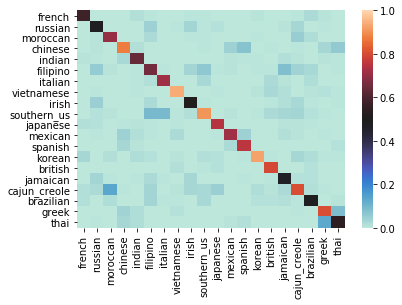

In [56]:
summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.57      0.69       120
           1       0.67      0.49      0.57       198
           2       0.76      0.70      0.73       362
           3       0.81      0.88      0.84       696
           4       0.80      0.64      0.71       181
           5       0.65      0.66      0.66       658
           6       0.84      0.72      0.77       302
           7       0.88      0.94      0.91       783
           8       0.75      0.52      0.61       159
           9       0.81      0.91      0.85      1932
          10       0.87      0.75      0.81       147
          11       0.85      0.72      0.78       348
          12       0.83      0.75      0.79       183
          13       0.91      0.93      0.92      1631
          14       0.86      0.80      0.83       199
          15       0.65      0.47      0.54       118
          16       0.72      0.81      0.76      1076
          17       0.73    

<h1>Comparison</h1>

<table>
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
    <th>Precision</th>
      <th>Recall</th>
      <th>F1-Score</th>
  </tr>
  <tr>
    <td>ANN</td>
    <td>80.12%</td>
    <td>79%</td>
    <td>71%</td>
    <td>73%</td>
  </tr>
  <tr>
      
<td>SVM(RBF Kernel)</td>
    <td>82%</td>
    <td>80%</td>
    <td>73%</td>
    <td>76%</td>
    </tr>
    <tr>
    <td>Logistic Regression</td>
    <td>79.41%</td>
    <td>76%</td>
    <td>69%</td>
    <td>72%</td>
  </tr>
  <tr>
    <td>SVM(Linear)</td>
    <td>79.05%</td>
    <td>77%</td>
    <td>68%</td>
    <td>72%</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>75.2%</td>
    <td>82%</td>
    <td>58%</td>
    <td>65%</td>
  </tr>
  <tr>
    <td>Ensemble</td>
    <td>80.6%</td>
    <td>79%</td>
    <td>70%</td>
    <td>74%</td>
  </tr>
</table>


<h1>Submission Accuracies</h1>

<table>
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
    </tr>
      
<td>SVM(RBF Kernel)</td>
    <td>82.119%</td>
    </tr>
    <tr>
<td>ANN</td>
    <td>80.752%</td>
    </tr>
    <tr>
    <td>Naive Bayes</td>
    <td>79.827%</td>
    </tr>
 <tr>
    <td>Ensemble</td>
    <td>79.475%</td>
    </tr>  
 <tr>
    <td>Logistic Regression</td>
    <td>78.388%</td>
    </tr>
<tr>
    <td>SVM(Linear Kernel)</td>
    <td>78.207%</td>
    </tr>

</table>
